In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 

In [2]:
# Define constants
a = 0.2
L = 1.0
N = 201
dx = L / (N - 1)
dt = 0.5 * dx / np.abs(a)  # Adjusted time step for stability
x = np.linspace(0, L, N)
T = 2.5

In [3]:
# Define initial condition
def u0(x):
    return np.sin(2 * np.pi * x)

# Implement Lax discretization scheme
def lax_update(u, a, dt, dx):
    u_new = np.zeros_like(u)
    alpha = a * dt / (2 * dx)

    for i in range(1, N - 1):
        u_new[i] = 0.5 * (u[i + 1] + u[i - 1]) - alpha * (u[i + 1] - u[i - 1])

    # Apply periodic boundary conditions
    u_new[0] = u_new[-2]
    u_new[-1] = u_new[1]

    return u_new


Wave energy (initial): 1.2275e-06
Wave energy (final): 1.0778e-06
Wave Energy Percentage Change -12.2 %


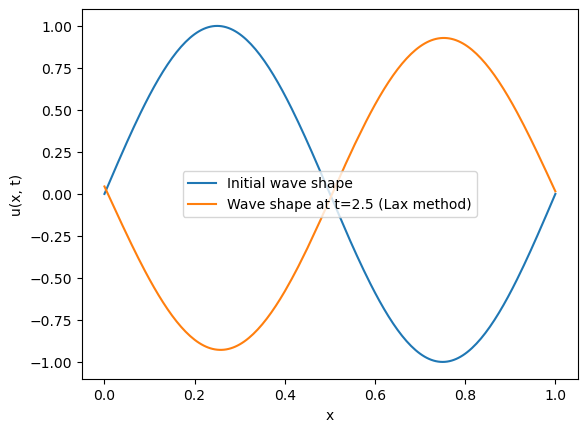

In [4]:
# Solve the wave equation using Lax method
u = u0(x)
for t in np.arange(0, T, dt):
    u = lax_update(u, a, dt, dx)

# Calculate wave energy
def wave_energy(u, dx):
    return np.sum(0.5 * (u[1:] - u[:-1])**2) * dx

E_initial = wave_energy(u0(x), dx) / N
E_final = wave_energy(u, dx) / N

print("Wave energy (initial):", round(E_initial, 10))
print("Wave energy (final):", round(E_final, 10))
print("Wave Energy Percentage Change", round(((E_final - E_initial) / E_initial * 100), 2), "%")

# Plot the solution
plt.plot(x, u0(x), label="Initial wave shape")
plt.plot(x, u, label="Wave shape at t=2.5 (Lax method)")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.show()